# Music21 Tutorial

## 1 Introduction

*Music21* is a Python “toolkit for analyzing, searching, and transforming music in symbolic (score-based) forms” (Cuthbert 2010). Because of IPython's ability to display and render images, scores and snippets can be viewed directly in the notebook.

The *Music21* website is here: http://web.mit.edu/music21/ which contains a user guide and a searchable index of all modules

This tutorial is my adaptation of the easy and basic demonstrations available in *Music21 User's Guide (http://web.mit.edu/music21/doc/usersGuide/index.html), although I have customised all examples to be concise and relevant for this Module.

## Some Python Basics

I think almost everyone in the class has used Python, but some of you have only been modestly exposed to it while others are pros and use it everyday. In order to maximize your benefit working with music21 (and to minimize your frustration) it will be helpful for those of you with weaker Python skills to review any of these concepts that may be rusty or unfamiliar:

[Objects](https://data-flair.training/blogs/python-object/) <br/>
[Classes](https://data-flair.training/blogs/python-class/) <br/>
[Methods](https://data-flair.training/blogs/python-method/) <br/>
[Functions](https://data-flair.training/blogs/python-function/) <br/>
[Data Types](https://data-flair.training/blogs/python-data-structures-tutorial/) <br/>
[Loops](https://data-flair.training/blogs/python-loop/)<br/>

...Or any of the other chapters that may be helpful or interesting. There are lots of other (possibly better) sources on Python, this one is just organized nicely (in Jupyter!) and it's concise.


## Importing music21

Many of you will be familiar with the concept of "not polluting your namespace" and may have been taught that importing "everything" from a package is un-pythonic and bad programming practice. While that is true, in our case, we are working in a virtual environment with a limited set of libraries and functions. 
For the most part, you can safely run `from music21 import *` and everything should run just fine. Of course, if you want to try to get in the habit of better programming practices, you can only import the modules you need.


In [2]:
from music21 import note, corpus, converter, graph, chord, stream, key
%config InlineBackend.figure_format = 'svg'

If you at first don't know what you will need, you can simply `import music21` and then later import the particular modules you need in the cell that you need them. (Or else come back to the top and add them back in)

## 2 Music21 Objects

The info below (up to the next subsection & minus the graphic) was taken directly from the music21 user guide: http://web.mit.edu/music21/doc/usersGuide/usersGuide_12_music21object.html 

In [3]:
#load some music from the built-in corpus
opus133 = corpus.parse('beethoven/opus133.mxl')

if we try to look at our variable, what happens?

In [4]:
opus133

<music21.stream.Score 0x2aaadf924070>

opus133 is a score *object*. What are the properties of this object? Everything that we will be be working with --- Note objects, Chord objects, Stream objects, etc. --- are subclasses of an object that, for lack of a better name, is called a *Music21Object*.

A Music21Object is something that can go in a Stream, knows where it is in a Stream, and has a Duration at `.duration`. 

Of course, not every object in Python is a Music21Object, but a little surprisingly, not every object in music21 is a “Music21Object”. For instance, the Pitch object is not. If you try to put one in a Stream, you’ll get an error


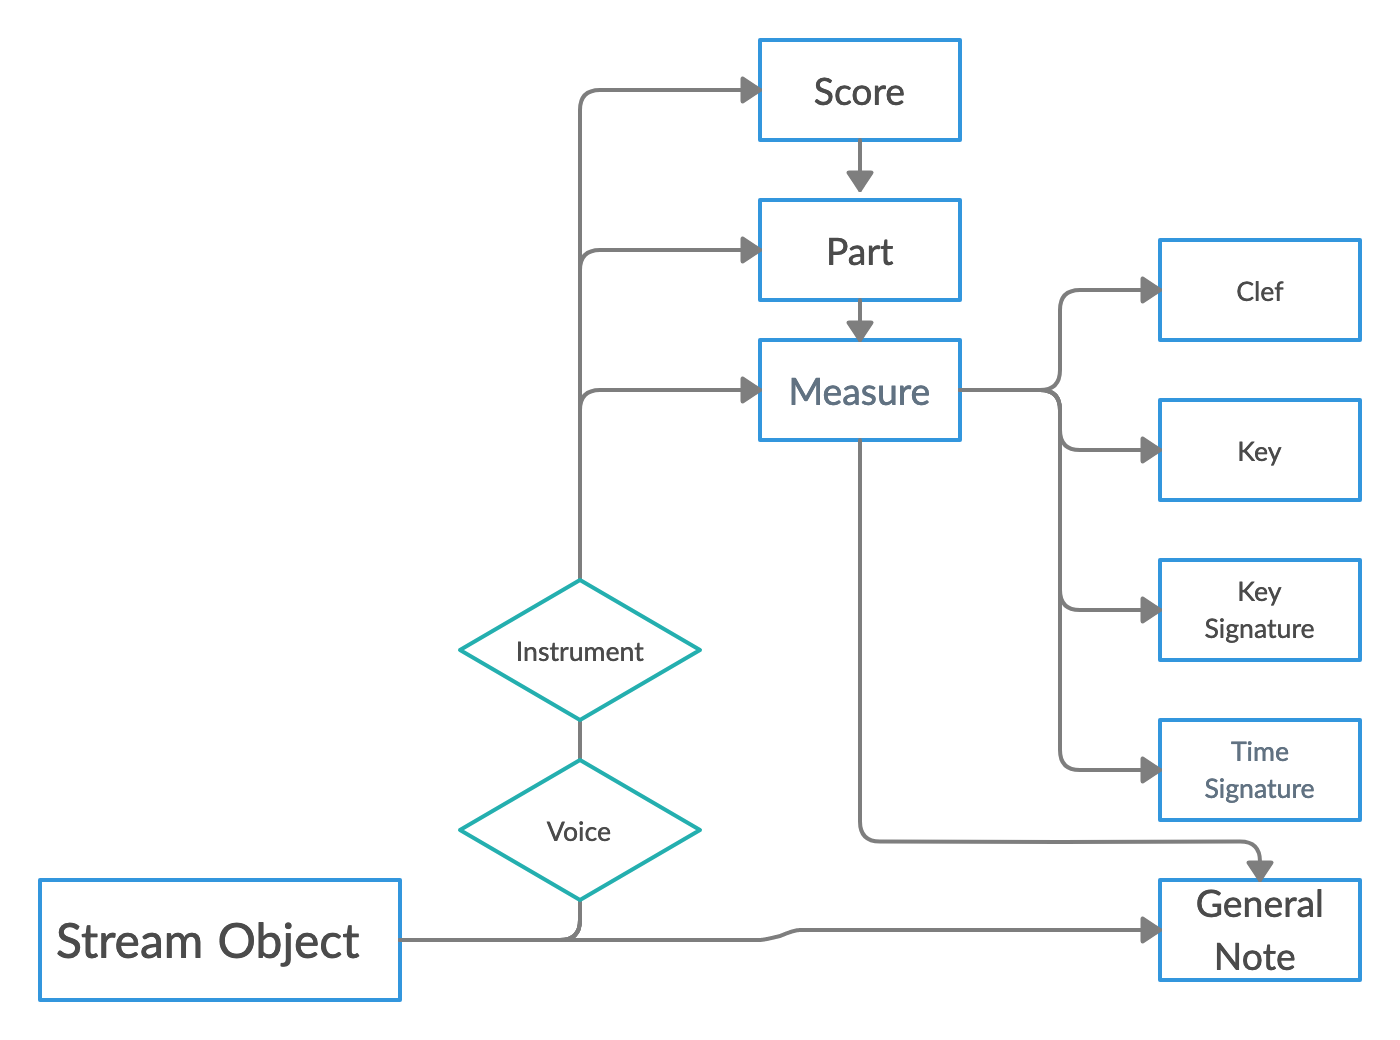

In [5]:
from IPython.display import Image
Image('Images/Music21.jpg', width=700)

The class of an object cannot (well, should not) change after it’s been created. 

For those who are familiar with HTML/Javascript/DOM programming, a Python Class is most similar to a DOM Tag. So DOM methods such as `.getElementsByTagName` are similar to music21’s `.getElementsByClass`.

#### Attributes and Properties

Once you know that something is a music21Object you can exploit the attributes of the object for musical purposes.

It is helpful in using music21 to understand the concept of "inner" or "nested" classes, as this is used extensively. see [here](https://www.datacamp.com/community/tutorials/inner-classes-python)

In [6]:
#create a music21 Note object with letter name "A"
aNote = note.Note('A')
aNote

<music21.note.Note A>

In [7]:
type(aNote)

music21.note.Note

We can *retrieve* attributes of an object by using the dot notation:

In [8]:
aNote.name

'A'

In [9]:
aNote.duration

<music21.duration.Duration 1.0>

Some objects have attributes that are automatically assigned to inner objects. For example, the Pitch object is stored within the Note object. If one creates an instance of a Note (by, say, assigning a letter name) then it will automatically be assigned a pitch attibute.

In [10]:
aNote.pitch

<music21.pitch.Pitch A>

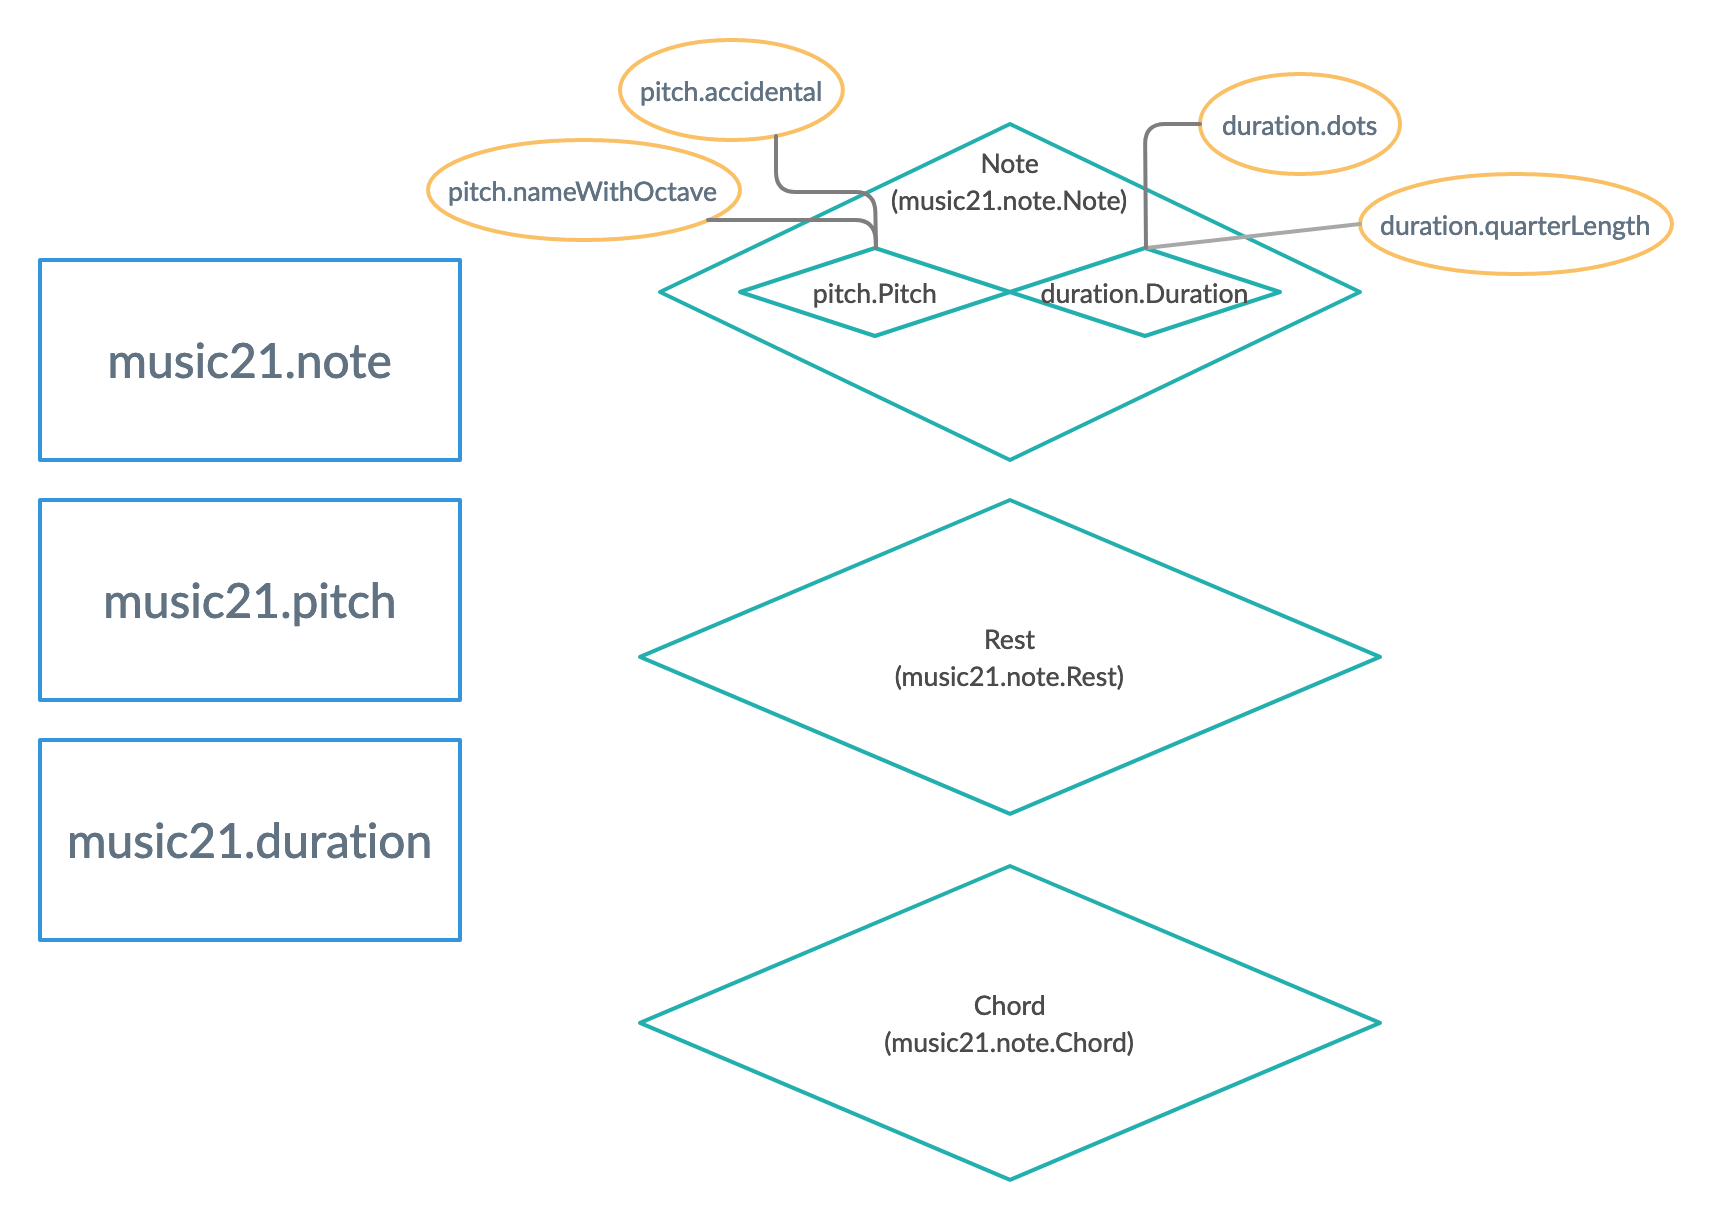

In [11]:
Image('Images/m21_ModulesObjectsAttributes.jpg', width=700)

We can also use the dot notation (with parentheses) to call methods:

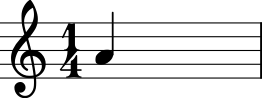

In [12]:
aNote.show()

We can assign attributes much like you would assign a variable. Though you have to know what the attributes are. Note that in Jupyter you can use the `tab` to autocomplete. Try typing `aNote.` and then `tab` to see its attributes.

We can set or update the values/properties of (some) attributes (including overwriting defaults) like this:

In [13]:
aNote.octave = 5
aNote.nameWithOctave

'A5'

In [14]:
aNote.duration.quarterLength = 1.5

In [15]:
aNote.duration

<music21.duration.Duration 1.5>

## 3 Load music

You can load any of the thousands of scores that come with *music21*. A list of available scores is available at http://web.mit.edu/music21/doc/about/referenceCorpus.html and it contains a lot of Bach, some Beethoven, Chopin, Handel, Haydn, Mozart, Palestrina, Monteverdi, Josquin des Prez, Schubert, Schumann (both Clara and Robert) and thousands of folk songs.

### 3.1 Load a score from build-in corpus in Music21

We already used this `corpus.parse` method earier, but I'm repeating it again below for clarity. Technically opus133 was already defined and we didn't have to do it again.

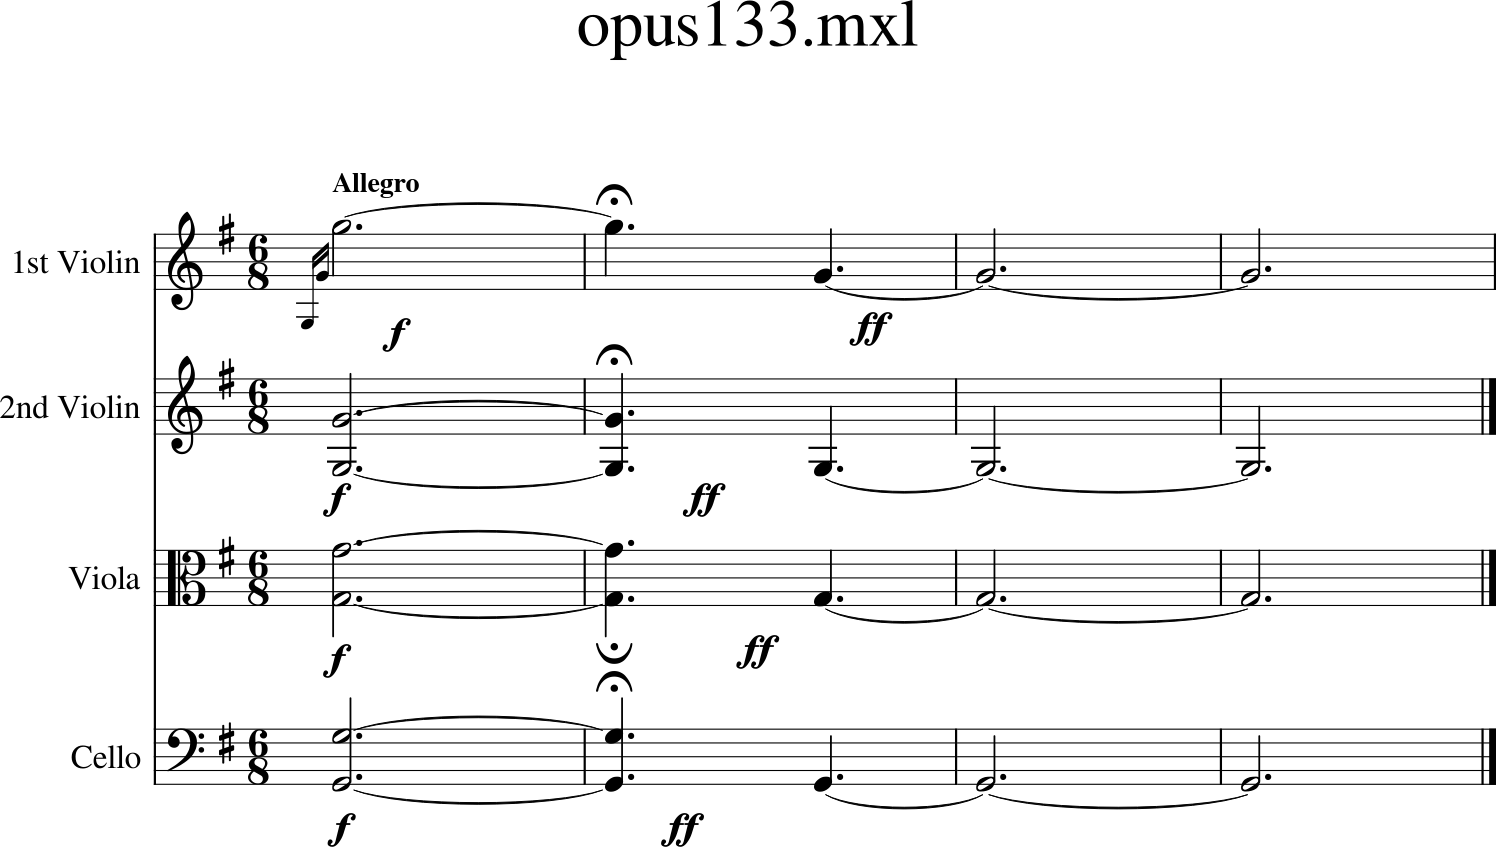

In [16]:
opus133 = corpus.parse('beethoven/opus133.mxl') # we "parse" one specific work from the corpus
opus133.measures(1, 4).show() # Show first 4 bars

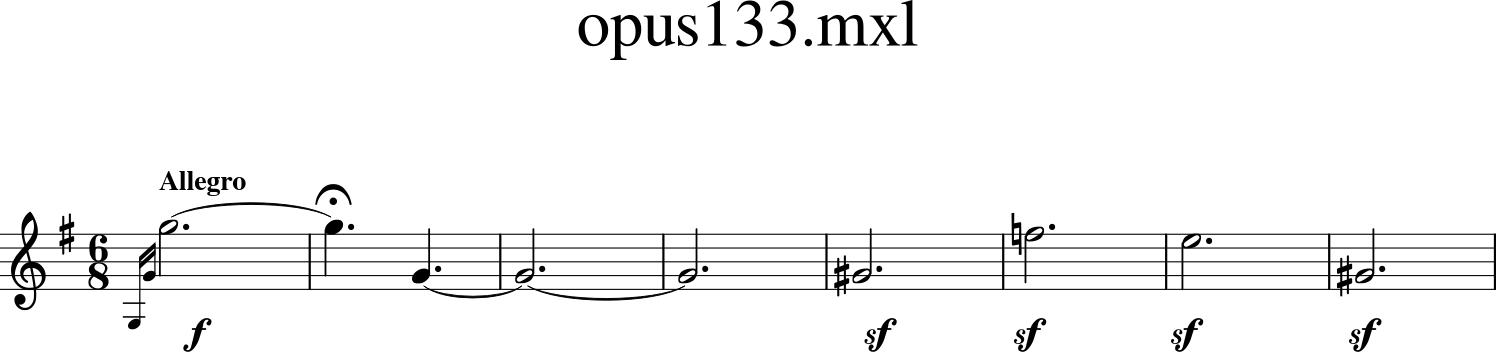

In [17]:
opus133violin = opus133.getElementById('1st Violin') # just select the 1st violin part 
opus133violin.measures(1,8).show() # let's look at first 8 bars 

### 3.2 Load a score from online corpus
You can also take any score from online collections such as **kernscores** or **openscore** (Musescore). 

In [18]:
import music21
en = music21.environment
en.set('autoDownload', 'allow')

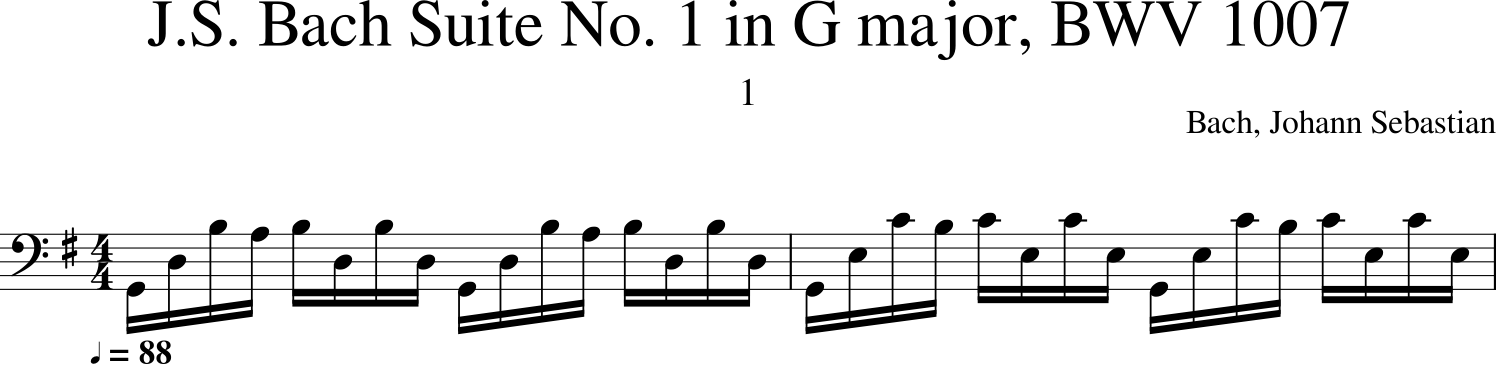

In [19]:
# Here's an example of how to load J.S. Bach Suite No. 1 in G major from internet:
no1 = converter.parse('http://kern.ccarh.org/cgi-bin/ksdata?l=cc/bach/cello&file=bwv1007-01.krn')
no1.metadata.movementName="J.S. Bach Suite No. 1 in G major, BWV 1007" # Add title
no1.measures(1, 2).show() # show first 2 bars

In [20]:
### 3.3 Load a local score from relative path (absolute path of course also works)
myscore = converter.parse('musi4843-data/KernFiles/ClassicalMusic/bach/bhchorale/chor001.krn')

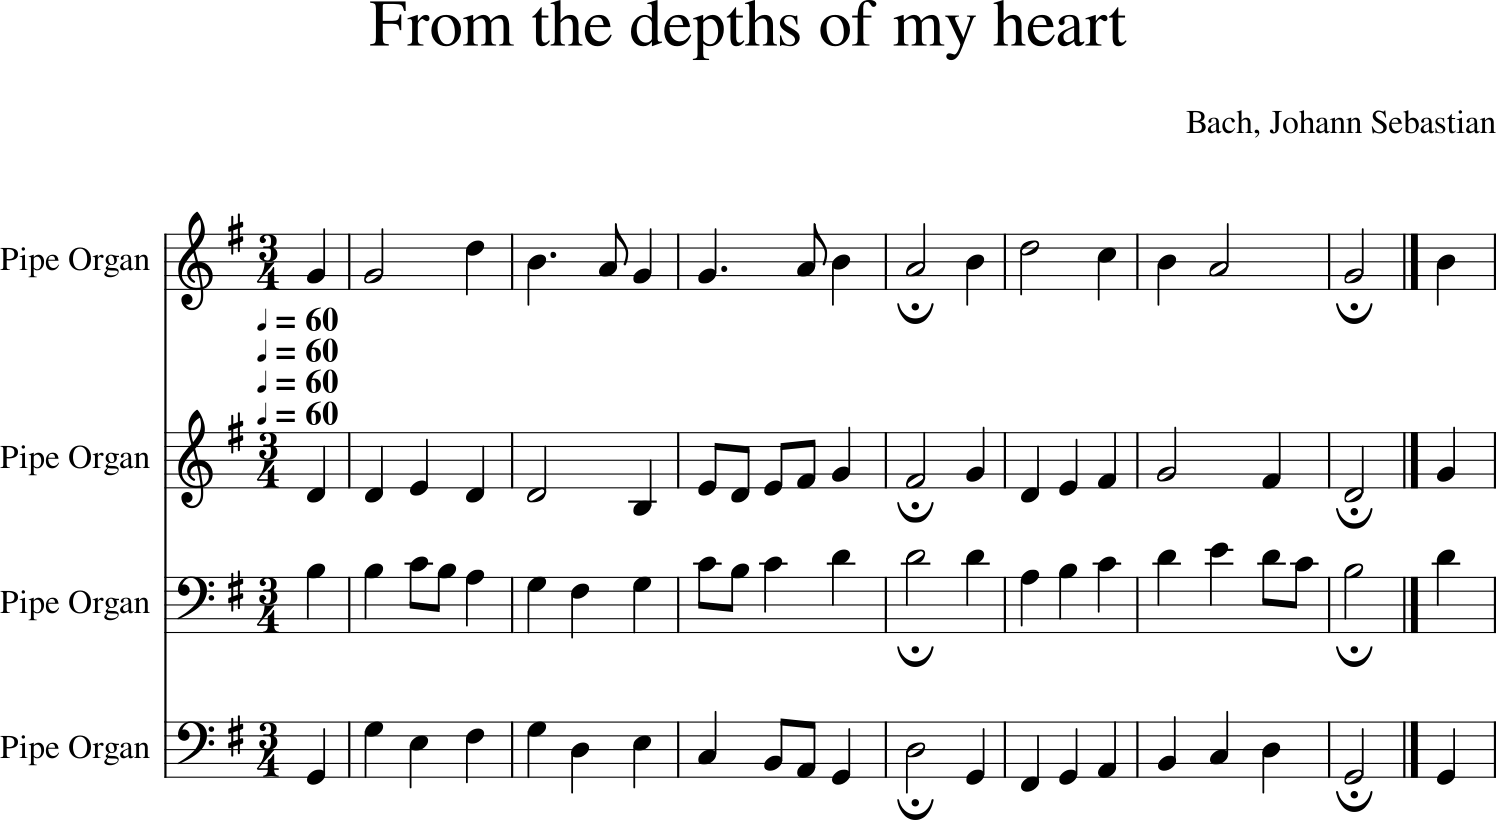

In [21]:
myscore.measures(0,7).show()

### 3.4 Create simple score

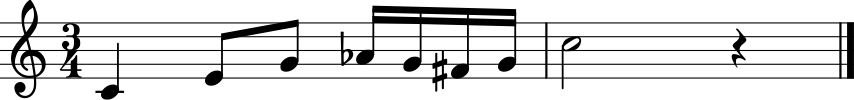

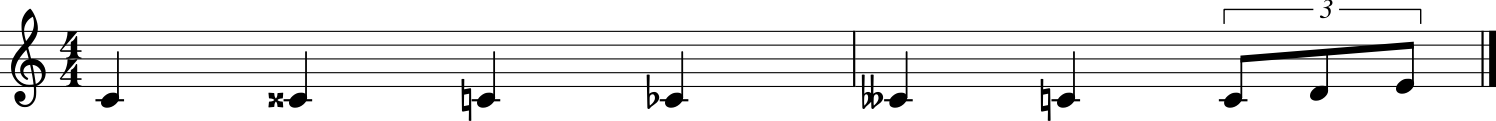

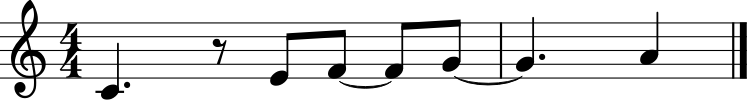

In [22]:
# You can create simple (monophonic only) scores using a shorthand called tinynotation:
ex1 = converter.parse("tinynotation: 3/4 c4 e8 g a-16 g f# g c'2 r4")
ex1.show()
ex2 = converter.parse('tinyNotation: 4/4 c4 c## cn c- c-- c trip{c8 d e}')
ex2.show()
ex3 = converter.parse('tinyNotation: 4/4 c4. r8 e8 f~ f g2 a4')
ex3.show()

### 3.5 Load a local (custom) corpus <br/><warning - still testing behavior on server!!!> 
You can create a corpus from your own set of local files, and then interact with it in a similar way that you would interact with music21's built-in corpus.

To do this, you can first name the corpus. This corpus will remain a permanent part of your music21 collection and will be available from session to sesssion.

In [31]:
#create instance of local corpus and name it
localModeCorpus = corpus.corpora.LocalCorpus('/storage/home/hpaceice1/carthur9/SymbolicData/PartOne_Originals/GlareanDuos')
#create path to the corpus
localModeCorpus.addPath('/storage/home/hpaceice1/carthur9/SymbolicData/PartOne_Originals/GlareanDuos')

In [32]:
#save the corpus - don't worry too much about warnings
localModeCorpus.save()

/storage/home/hpaceice1/shared-classes/envs/musi4843/lib/python3.8/site-packages/music21/corpus/corpora.py: WARNING: /storage/home/hpaceice1/carthur9/SymbolicData/PartOne_Originals/GlareanDuos metadata cache: starting processing of paths: 18
/storage/home/hpaceice1/shared-classes/envs/musi4843/lib/python3.8/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /scratch/58272.sched-pace-ice.pace.gatech.edu/music21/local-/storage/home/hpaceice1/carthur9/SymbolicData/PartOne_Originals/GlareanDuos.p.gz
bundles.py: WARNING: MetadataBundle Modification Time: 1603134728.364036
bundles.py: WARNING: Skipped 0 sources already in cache.
bundles.py: WARNING: updated 1 of 18 files; total errors: 0 ... last file: /storage/home/hpaceice1/carthur9/SymbolicData/PartOne_Originals/GlareanDuos/Hypodorian/Hypodorian Duo-Pleni Sunt from Missa O Salutaris_trans.xml
bundles.py: WARNING: updated 2 of 18 files; total errors: 0 ... last file: /storage/home/hpaceice1/carthur9/SymbolicData/PartOne_Ori

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/58272.sched-pace-ice.pace.gatech.edu/music21/local-/storage/home/hpaceice1/carthur9/SymbolicData/PartOne_Originals/GlareanDuos.p.gz'

In [26]:
#check for settings
localModeCorpus.existsInSettings

True

In [27]:
#check for names of all saved local corpora
corpus.manager.listLocalCorporaNames()

[None, '/storage/home/hpaceice1/carthur9/SymbolicData/PartOne_Originals']

#### Search metadata of local corpus

In [28]:
modeMetadata = corpus.corpora.LocalCorpus('modeCorpus').metadataBundle
modeMetadata

<music21.metadata.bundles.MetadataBundle 'modeCorpus': {0 entries}>

In [29]:
output = corpus.corpora.LocalCorpus('modeCorpus').search('4/4')

In [30]:
[print(i) for i in output.title]

AttributeError: 'MetadataBundle' object has no attribute 'title'

#### Summary
* You were able to run *Music21* within the dynamic workbook (this document).
* You were also able to load some music from the internal corpus that comes with *Music21*.
* You noticed how you can *select* **parts** or **measures** of music.
* You could display the using **show** command.


## 4 Visualise music
Let's look at some ways of summarising the musical content.

In [ ]:
# ".show" method again:
schoenberg = corpus.parse('schoenberg/opus19')
schoenberg.measures(1, 6).show() # Show first 4 bars

### 4.1 Visualise raw note events

One of the obvious advantages music21 has over humdrum is its native ability to interact with any other python package, such as those for computing data visualization (e.g., `matplotlib`), those for running statistics (e.g., `statsmodels`), or anything else you may want to do. Note that music21 already integrates some of these other packages "under the hood" to allow things like displaying the score, creating graphs, or even making some complex calculations.

In [ ]:
# Let's look at the pianoroll representation of the 2nd mov.
schoenberg.measures(1, 10).plot() # scoreObject.measures.plot() gives us Piano roll view

### 4.3 Summary of note and duration frequencies

In [ ]:
# What about the distributions of pitches (pitch-class distribution)? 
schoenberg.plot('histogram', 'pitchClass') # arg1 = plot type; arg2 = what to plot in the histogram

In [ ]:
# What about durations and pitch-classes? Are they organised in a particular fashion?
p = graph.plot.HistogramQuarterLength(schoenberg) #See the many types of graphs available
p.run() # note PlotStream objects have to be "run"

Notice it only counts 4 quarter notes and the longest duration is 2 (not 2.5). Examine the score using `schoenberg.show()`. How do you think the durations are being aggregated? (Note you will not find the answer on the graphs page for music21 documentation). We will engage more with this issue in our "counting things" lesson.

### 4.4 Visualise dynamics

In [ ]:
# Visualise the dynamics
beethoven = corpus.parse('beethoven/opus133.mxl')
beethoven.measures(1,62).plot('dolan', fillByMeasure=True, segmentByTarget=True)

### Exercise:
*Can you compare the pitch distributions of the Schoenberg and Beethoven examples? Note that you can visualise all pitches simply by using the keyword pitch:* 

`schoenberg.plot('histogram', 'pitch')`




In [ ]:
# write you command here...


## 5 Analyse music

So far we have not been able to much more than an advanced music sequencer might have been able to do to visualise and select parts of music. Let's turn our attention to the analytical qualities of *Music21*.

### 5.1 Qualities of chords

*Music21* can infer a lot of information from stacks of pitches. For music21 chords are simply "stacks of pitches." It does not inherently know that there is a B major chord with an A passing tone above it - it will say there is a B major 9th chord. However, the built-in functionality for dealing with chords is very useful. 

In [ ]:
# Let's put some pitches together to form three chords:
chord1 = chord.Chord(["C4","G4","E5"]) # pitches
chord1.duration.type = 'half'          # duration
kc = key.Key('C')                      # key (optional but useful later)
chord1B = chord1.closedPosition()      # A variant in closed position

chord2 = chord.Chord("C F A")
chord2.duration.type = 'half'

chord3 = chord.Chord("D F G B")
chord3.duration.type = 'half'
chord1.show()                          # Just show one of these chords

In [ ]:
# Music21 can tell you quite useful things about any of the chords. For instance:
chord3.show()
print(chord3.commonName)
print(chord3.quality)
print(chord3.forteClass)
print(chord3.orderedPitchClasses)

In [ ]:
# We can analyse the chords in a key context and put the roman names into the score
from music21 import roman
chord1.lyric = roman.romanNumeralFromChord(chord1, kc).figure
chord2.lyric= roman.romanNumeralFromChord(chord2, kc).figure
chord3.lyric= roman.romanNumeralFromChord(chord3, kc).figure
chord1B.lyric= roman.romanNumeralFromChord(chord1B, kc).figure

# Let's append the chords into a stream and look at the score with roman numerals.
stream1 = stream.Stream()
stream1.append(chord1)
stream1.append(chord2)
stream1.append(chord3)
stream1.append(chord1B)
stream1.show()

#### Exercise 2:

Explore some more unusual chords by changing the pitches of the chords 1, 2 and 3. Try again to automate the Roman numeral analysis and see what happens!

Note: notice how each chord event is tied (or "tagged") with a particular harmony in a "hack-y" kind of way --- by relying on the lyrics stream. Note that if you already have lyrics in your data this can be quite tricky!!

### 5.2 Chord analysis
We can use the chord analysis capacity of *Music21* to carry out harmonic analysis.

In [ ]:
#Let's analyze a Bach chorale -- many of these are built-in to music21's corpus
b = corpus.parse('bwv66.6') # We load a Bach Chorale BWV 66
b.measures(0, 2).show()

In [ ]:
# Slice the chords for each beat with chordify -- equivalent to "ditto" function in Humdrum
bChords = b.chordify()
bChords.metadata.movementName = 'Chord reduction'         # Put a label to the score
bChords.measures(0, 2).show()

Be aware that by default any voice-leading gets "lost" with chordify (although one can get around it). For example, there are always 4 parts in a chorale, but you will see sometimes a note gets doubled. It is not simply that there are notes "on top of each other" in the score view; those notes have actually been collapsed. You can see this if you use the "text" view.

In [ ]:
#b.insert(0, bChords)

for c in bChords.recurse().getElementsByClass('Chord'):   # This is where the analysis happens
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))

bChords.metadata.movementName = 'Analysis with Roman Numerals'
bChords.measures(0,2).show()

#### Exercise 3:

Is this a plausible harmonic analysis of the chorale beginning? What happens in the last beat of the last bar shown? What is the III6 chord actually? If in doubt, expand the selection of bars to show how the chorale continues. Optionally, you could also check what another chorale analysis would look like. 
The music21 filenames of all chorales can be found at <A HREF="http://web.mit.edu/music21/doc/about/referenceCorpus.html">http://web.mit.edu/music21/doc/about/referenceCorpus.html</A>. Don't forget to put the correct key into the analysis if you select another chorale. There is also an automatic way of estimating the key, which will be covered later.</span></p>

#### Summary
* You were able to load music21 modules
* You were introduced to some of the attributes and properties of notes, as well as how to access them.
* You were introduced to some of the functionality of the note, chord, and corpus objects.
* You were able to display the raw events of music (pianoroll, score view).
* You were able to load a score from the built-in corpus, a local file, or a file directly from a website with its own URL.
* Examples of simple visual summaries were introduced (pitch-class distribution, durations, etc.).
* You were able to see how music21 can infer chord qualities, can create chord reductions, and (if given a key) can create Roman numeral labels.